In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence

def plot_seasonal_time_series(data, season, year, var):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]
    
    if var == "Temp":
        frame = frame[["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp", "date", "Month"]]
    elif var == "Prec":
        frame = frame[["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec", "date", "Month"]]

    fig, axs = plt.subplots(3, 3, figsize = (40,10), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    fig.suptitle("A")
    axs = axs.ravel()

    frame_cols = frame.columns

    for i in range(len(frame_cols)):
        if i == 9:
            break
        else:
            frame[frame_cols[i]].groupby(frame["Month"]).plot(ax = axs[i])
            axs[i].set_title(frame_cols[i])

    plt.show()

def plot_seasonal_scatterplot(data, season, year):
    frame = data[(data["Season"] == season) & (data["Year"] == year)]

    prec = ["r1_prec", "r2_prec", "r3_prec", "r4_prec", "r5_prec", "r6_prec", "r7_prec", "r8_prec", "r9_prec"]
    temp = ["r1_temp", "r2_temp", "r3_temp", "r4_temp", "r5_temp", "r6_temp", "r7_temp", "r8_temp", "r9_temp"]

    fig, axs = plt.subplots(3, 3, figsize = (20,20), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = .2, wspace=.09)
    axs = axs.ravel()


    for i in range(9):
        if i == 9:
            break
        else:
            frame.groupby(frame["Month"]).plot.scatter(prec[i], temp[i], ax = axs[i])

    plt.show()

In [3]:
df = pd.read_csv("final_db.csv")
df

,date,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,r8_temp,...,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec,Year,Month,Day,Season
0,1958-01-04,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1958,1,4,Winter
1,1958-01-05,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,...,3.3,3.7,0.7,3.1,4.2,1.1,1958,1,5,Winter
2,1958-01-06,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,...,12.5,11.2,12.2,14.1,14.2,10.5,1958,1,6,Winter
3,1958-01-07,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,...,7.3,6.5,5.2,10.4,5.7,3.7,1958,1,7,Winter
4,1958-01-08,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,...,3.5,3.8,3.3,2.9,4.0,3.5,1958,1,8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2015-12-27,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,...,1.5,0.1,0.0,0.0,0.0,0.0,2015,12,27,Fall
21174,2015-12-28,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,...,6.1,3.7,5.0,5.4,0.0,5.1,2015,12,28,Fall
21175,2015-12-29,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,...,2.7,0.2,0.8,2.2,0.0,0.0,2015,12,29,Fall
21176,2015-12-30,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,...,5.1,3.5,3.4,3.2,0.0,3.6,2015,12,30,Fall


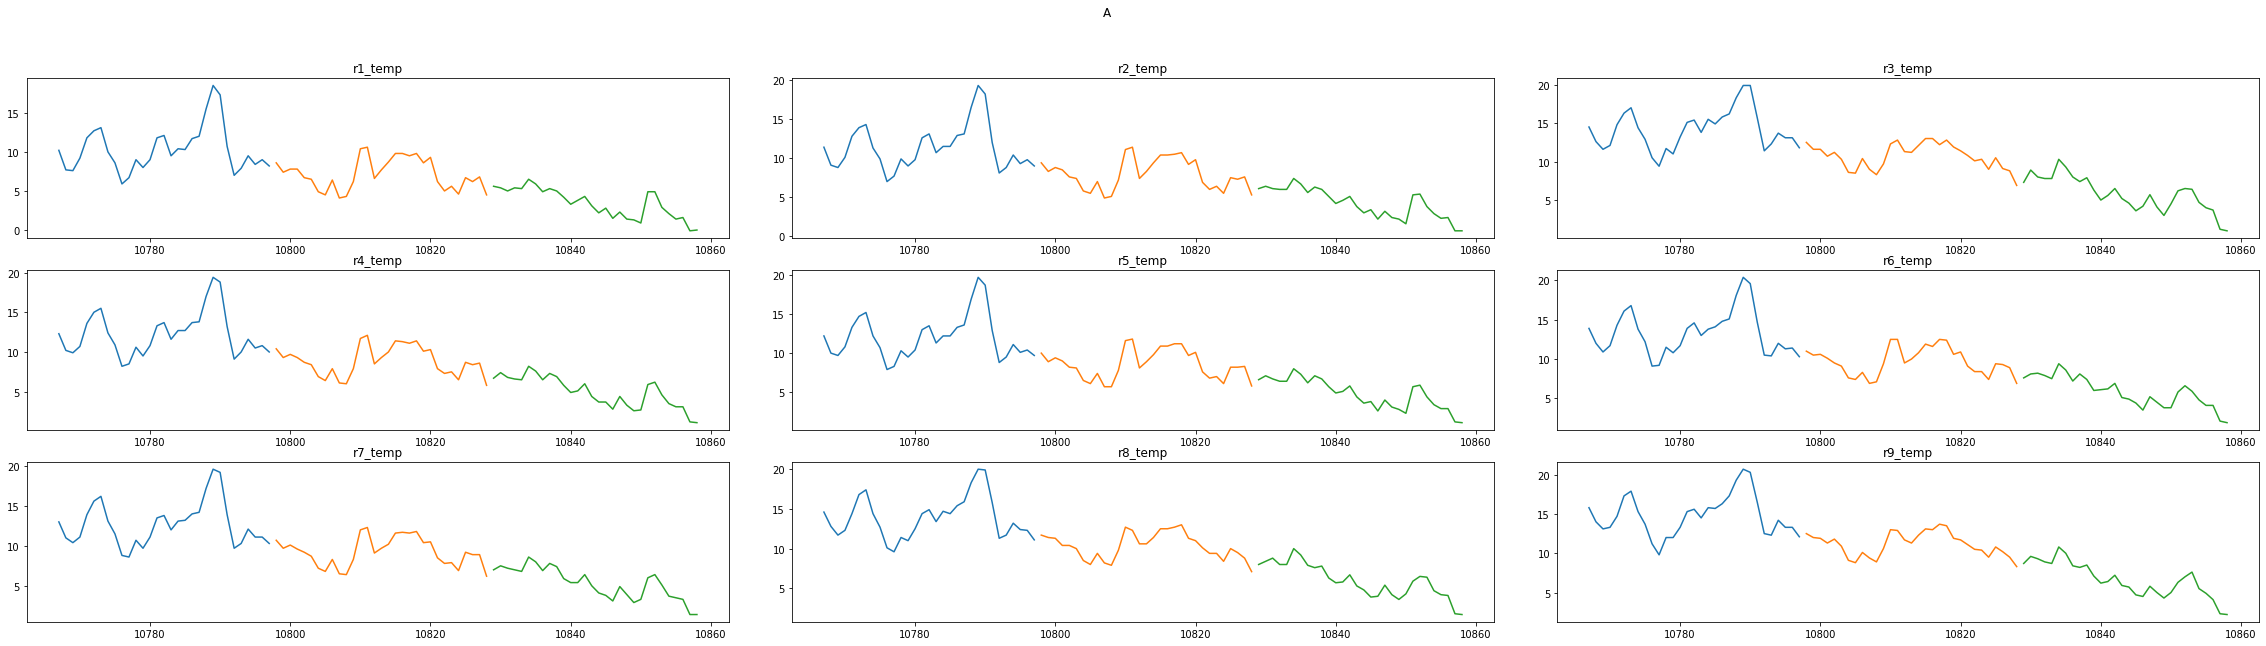

In [4]:
plot_seasonal_time_series(df, "Summer", 1987, "Temp")

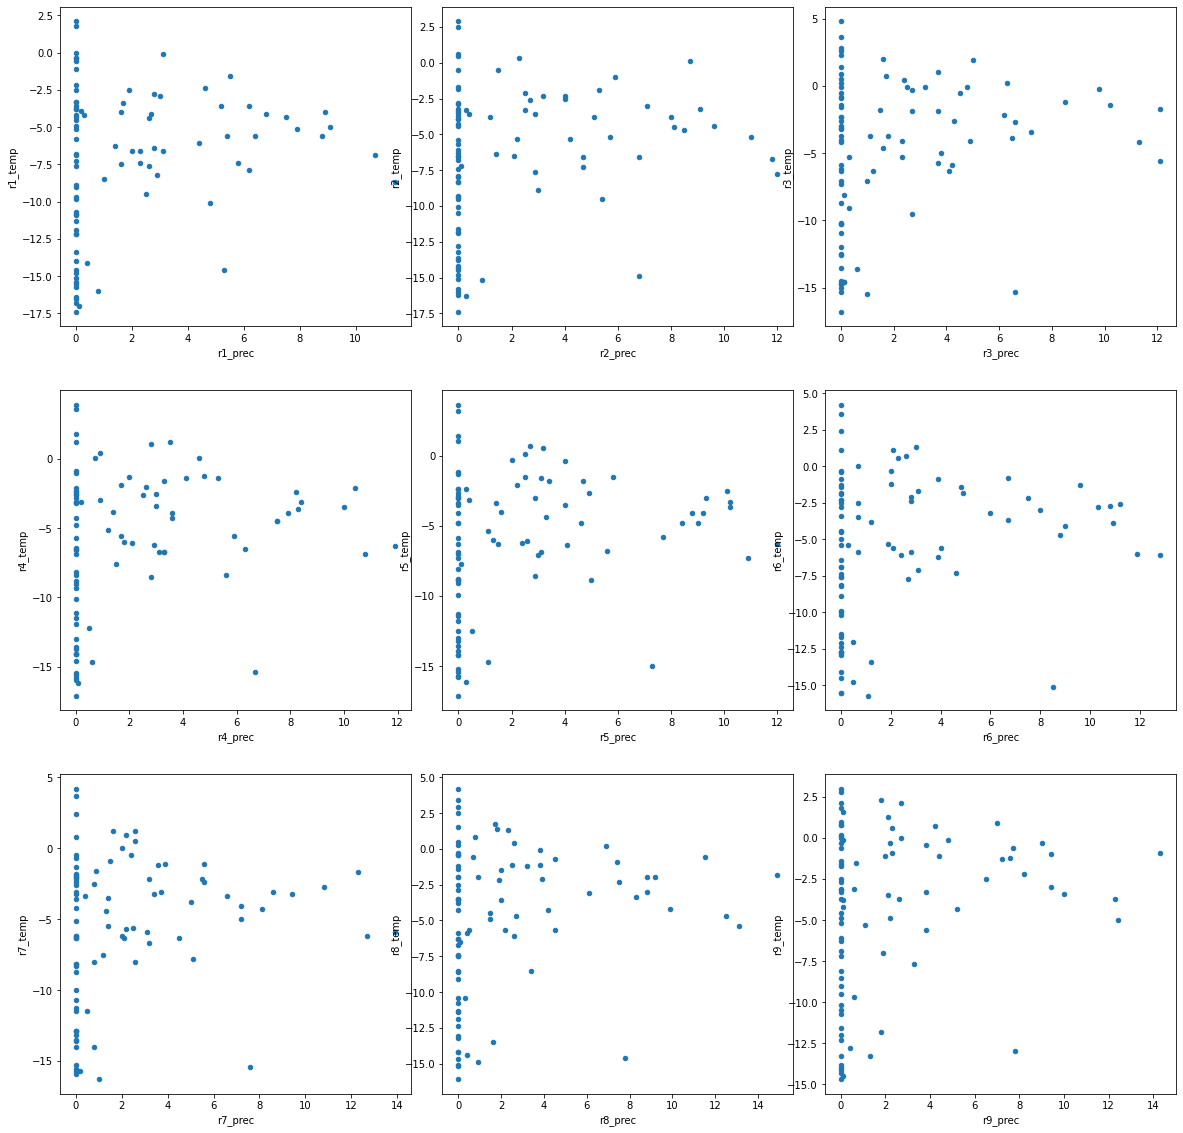

In [5]:
plot_seasonal_scatterplot(df, "Winter", 1999)

## Conversión de una serie de tiempo no periódica a una nube de puntos

In [6]:
x = np.linspace(0, len(df["date"]), len(df["date"]))
y = df["r1_temp"]

fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [7]:
max_embedding_dimension = 2
max_time_delay = 1000
stride = 30

embedder_periodic = SingleTakensEmbedding(
    parameters_type="search",
    time_delay=max_time_delay,
    dimension=max_embedding_dimension,
    n_jobs=2,
    stride=stride,
)

def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
    """Fits a Takens embedder and displays optimal search parameters."""
    y_embedded = embedder.fit_transform(y)

    if verbose:
        print(f"Shape of embedded time series: {y_embedded.shape}")
        print(
            f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
        )

    return y_embedded

y_periodic_embedded = fit_embedder(embedder_periodic, y)

Shape of embedded time series: (697, 2)
Optimal embedding dimension is 2 and time delay is 269


In [8]:
embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 270
stride = 10

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y)

plot_point_cloud(y_nonperiodic_embedded)

## Se realiza análisis de series de tiempo para intervalo de tiempo dado

In [17]:
def analyze_time_interval(data, starting_year, longitude, var, region, dimension):
    to_plot = data[(data["Year"] >= starting_year) & (data["Year"] <= starting_year+longitude)]
    temp="r"+str(region)+"_temp"
    prec="r"+str(region)+"_prec"
    to_plot = to_plot[[temp, prec, "flow"]]

    if var == "Temp":
        to_plot = to_plot[temp]
    elif var == "Prec":
        to_plot = to_plot[prec]
    elif var == "Flow":
        to_plot = to_plot["flow"]

    x = np.linspace(0, len(to_plot), len(to_plot))
    y = to_plot

    print(y)

    fig = go.Figure(data=go.Scatter(x=x, y=y))
    fig.update_layout(xaxis_title="Tiempo", yaxis_title= var)
    fig.show()

    max_embedding_dimension = 10
    max_time_delay = 1000
    stride = 30

    embedder_periodic = SingleTakensEmbedding(
        parameters_type="search",
        time_delay=max_time_delay,
        dimension=max_embedding_dimension,
        n_jobs=2,
        stride=stride,
    )

    def fit_embedder(embedder: SingleTakensEmbedding, y: np.ndarray, verbose: bool=True) -> np.ndarray:
        """Fits a Takens embedder and displays optimal search parameters."""
        y_embedded = embedder.fit_transform(y)

        if verbose:
            print(f"Shape of embedded time series: {y_embedded.shape}")
            print(
                f"Optimal embedding dimension is {embedder.dimension_} and time delay is {embedder.time_delay_}"
            )

        return y_embedded, embedder.time_delay_

    y_periodic_embedded, TD = fit_embedder(embedder_periodic, y)

    embedding_dimension_nonperiodic = dimension
    embedding_time_delay_nonperiodic = TD
    stride = 10

    embedder_nonperiodic = SingleTakensEmbedding(
        parameters_type="fixed",
        n_jobs=2,
        time_delay=embedding_time_delay_nonperiodic,
        dimension=embedding_dimension_nonperiodic,
        stride=stride)

    y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y)
    
    return y_nonperiodic_embedded

In [18]:
example = analyze_time_interval(df, 1958, 3, "Flow",9, 7)

0       1.723781
1       0.960882
2       0.001000
3       0.001000
4       0.316796
          ...   
1453    0.667094
1454    0.541895
1455    1.168459
1456    0.001000
1457    1.144542
Name: flow, Length: 1458, dtype: float64


Shape of embedded time series: (46, 2)
Optimal embedding dimension is 2 and time delay is 97


In [11]:
plot_point_cloud(example)

In [12]:
from gtda.homology import VietorisRipsPersistence

# 0 - connected components, 1 - loops, 2 - voids
homology_dimensions = [0, 1, 2]

nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(example[None, :, :]);

Persistence diagram for nonperiodic signal


In [13]:
df

,date,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,r8_temp,...,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec,Year,Month,Day,Season
0,1958-01-04,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1958,1,4,Winter
1,1958-01-05,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,...,3.3,3.7,0.7,3.1,4.2,1.1,1958,1,5,Winter
2,1958-01-06,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,...,12.5,11.2,12.2,14.1,14.2,10.5,1958,1,6,Winter
3,1958-01-07,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,...,7.3,6.5,5.2,10.4,5.7,3.7,1958,1,7,Winter
4,1958-01-08,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,...,3.5,3.8,3.3,2.9,4.0,3.5,1958,1,8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2015-12-27,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,...,1.5,0.1,0.0,0.0,0.0,0.0,2015,12,27,Fall
21174,2015-12-28,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,...,6.1,3.7,5.0,5.4,0.0,5.1,2015,12,28,Fall
21175,2015-12-29,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,...,2.7,0.2,0.8,2.2,0.0,0.0,2015,12,29,Fall
21176,2015-12-30,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,...,5.1,3.5,3.4,3.2,0.0,3.6,2015,12,30,Fall


In [14]:
data_slice = analyze_time_interval(df, 1959, 3, "Prec", 9, 3)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 2

In [16]:
df

,date,flow,r1_temp,r2_temp,r3_temp,r4_temp,r5_temp,r6_temp,r7_temp,r8_temp,...,r4_prec,r5_prec,r6_prec,r7_prec,r8_prec,r9_prec,Year,Month,Day,Season
0,1958-01-04,1.723781,-12.8,-13.000000,-13.0,-12.5,-12.500000,-12.7,-12.000000,-12.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1958,1,4,Winter
1,1958-01-05,0.960882,-7.8,-7.900000,-8.4,-7.0,-7.300000,-8.6,-6.500000,-7.7,...,3.3,3.7,0.7,3.1,4.2,1.1,1958,1,5,Winter
2,1958-01-06,0.001000,-11.0,-9.900000,-6.5,-8.5,-9.000000,-7.4,-7.900000,-6.8,...,12.5,11.2,12.2,14.1,14.2,10.5,1958,1,6,Winter
3,1958-01-07,0.001000,-13.2,-12.200000,-7.9,-10.7,-11.300000,-9.8,-10.100000,-8.5,...,7.3,6.5,5.2,10.4,5.7,3.7,1958,1,7,Winter
4,1958-01-08,0.316796,-19.9,-19.299999,-15.4,-18.4,-18.700001,-16.9,-17.700001,-15.9,...,3.5,3.8,3.3,2.9,4.0,3.5,1958,1,8,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21173,2015-12-27,2.177040,-12.5,-11.700000,-8.6,-11.0,-10.900000,-9.2,-9.700000,-8.4,...,1.5,0.1,0.0,0.0,0.0,0.0,2015,12,27,Fall
21174,2015-12-28,4.876250,-12.5,-11.900000,-9.1,-11.4,-11.200000,-9.8,-10.600000,-8.6,...,6.1,3.7,5.0,5.4,0.0,5.1,2015,12,28,Fall
21175,2015-12-29,4.998840,-11.9,-11.400000,-8.4,-10.8,-10.800000,-8.6,-9.300000,-7.2,...,2.7,0.2,0.8,2.2,0.0,0.0,2015,12,29,Fall
21176,2015-12-30,4.428777,-7.0,-6.500000,-3.4,-5.9,-6.100000,-4.8,-5.000000,-3.8,...,5.1,3.5,3.4,3.2,0.0,3.6,2015,12,30,Fall
